# monshaat academy 

### Load packages

In [1]:
### Load packages
import arabic_reshaper
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1. Load the data

### 1. Load the data

---


In [2]:
df=pd.read_csv('./dataset/courses.csv' , encoding = "UTF-8")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95623 entries, 0 to 95622
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   course_id              95623 non-null  int64  
 1   course_name            95623 non-null  object 
 2   course_start_date      95623 non-null  object 
 3   course_end_date        95623 non-null  object 
 4   course_category        95623 non-null  object 
 5   course_type            95520 non-null  object 
 6   student_name           95623 non-null  object 
 7   student_id             95623 non-null  int64  
 8   enrollment_date        95623 non-null  object 
 9   completed_date         28146 non-null  object 
 10  row_enrollment_date    95623 non-null  int64  
 11  row_completed_date     28146 non-null  float64
 12  completed_flag         95623 non-null  object 
 13  gender                 95349 non-null  object 
 14  city                   52914 non-null  object 
 15  ed

In [5]:
rate=pd.read_csv('./data/rate.csv' , encoding = "UTF-8")

In [5]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185201 entries, 0 to 185200
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   student_id   185201 non-null  int64 
 1   question     185200 non-null  object
 2   answer       185200 non-null  object
 3   submit_date  185201 non-null  object
 4   course_id    185201 non-null  int64 
 5   course_name  185201 non-null  object
 6   rate_score   185201 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.9+ MB


In [7]:
intrest=pd.read_csv('./data/intrest.csv' , encoding = "UTF-8")

In [7]:
intrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56175 entries, 0 to 56174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  56175 non-null  int64 
 1   intrest     56175 non-null  object
dtypes: int64(1), object(1)
memory usage: 877.9+ KB


### 2. Check for the datatypes of each column
---

In [8]:
df.dtypes

course_id                  int64
course_name               object
course_start_date         object
course_end_date           object
course_category           object
course_type               object
student_name              object
student_id                 int64
enrollment_date           object
completed_date            object
row_enrollment_date        int64
row_completed_date       float64
completed_flag            object
gender                    object
city                      object
education_level           object
job_status                object
studnet_english_level     object
register_date             object
dtype: object

In [9]:
rate.dtypes

student_id      int64
question       object
answer         object
submit_date    object
course_id       int64
course_name    object
rate_score      int64
dtype: object

In [10]:
intrest.dtypes

student_id     int64
intrest       object
dtype: object

#### Fix data type

In [11]:
#df date
df['course_start_date'] = pd.to_datetime(df.course_start_date)

In [12]:
df['course_end_date'] = pd.to_datetime(df.course_end_date)

In [13]:
df['enrollment_date'] = pd.to_datetime(df.enrollment_date)

In [14]:
df['completed_date'] = pd.to_datetime(df.completed_date)

In [15]:
df['register_date'] = pd.to_datetime(df.register_date)

In [16]:
df.dtypes

course_id                              int64
course_name                           object
course_start_date             datetime64[ns]
course_end_date               datetime64[ns]
course_category                       object
course_type                           object
student_name                          object
student_id                             int64
enrollment_date               datetime64[ns]
completed_date           datetime64[ns, UTC]
row_enrollment_date                    int64
row_completed_date                   float64
completed_flag                        object
gender                                object
city                                  object
education_level                       object
job_status                            object
studnet_english_level                 object
register_date                 datetime64[ns]
dtype: object

In [17]:
#rate data
rate['submit_date'] = pd.to_datetime(rate.submit_date)

In [18]:
rate.dtypes

student_id              int64
question               object
answer                 object
submit_date    datetime64[ns]
course_id               int64
course_name            object
rate_score              int64
dtype: object

####  Clean corrupted columns 

Text(0.5, 1.0, 'intrest data')

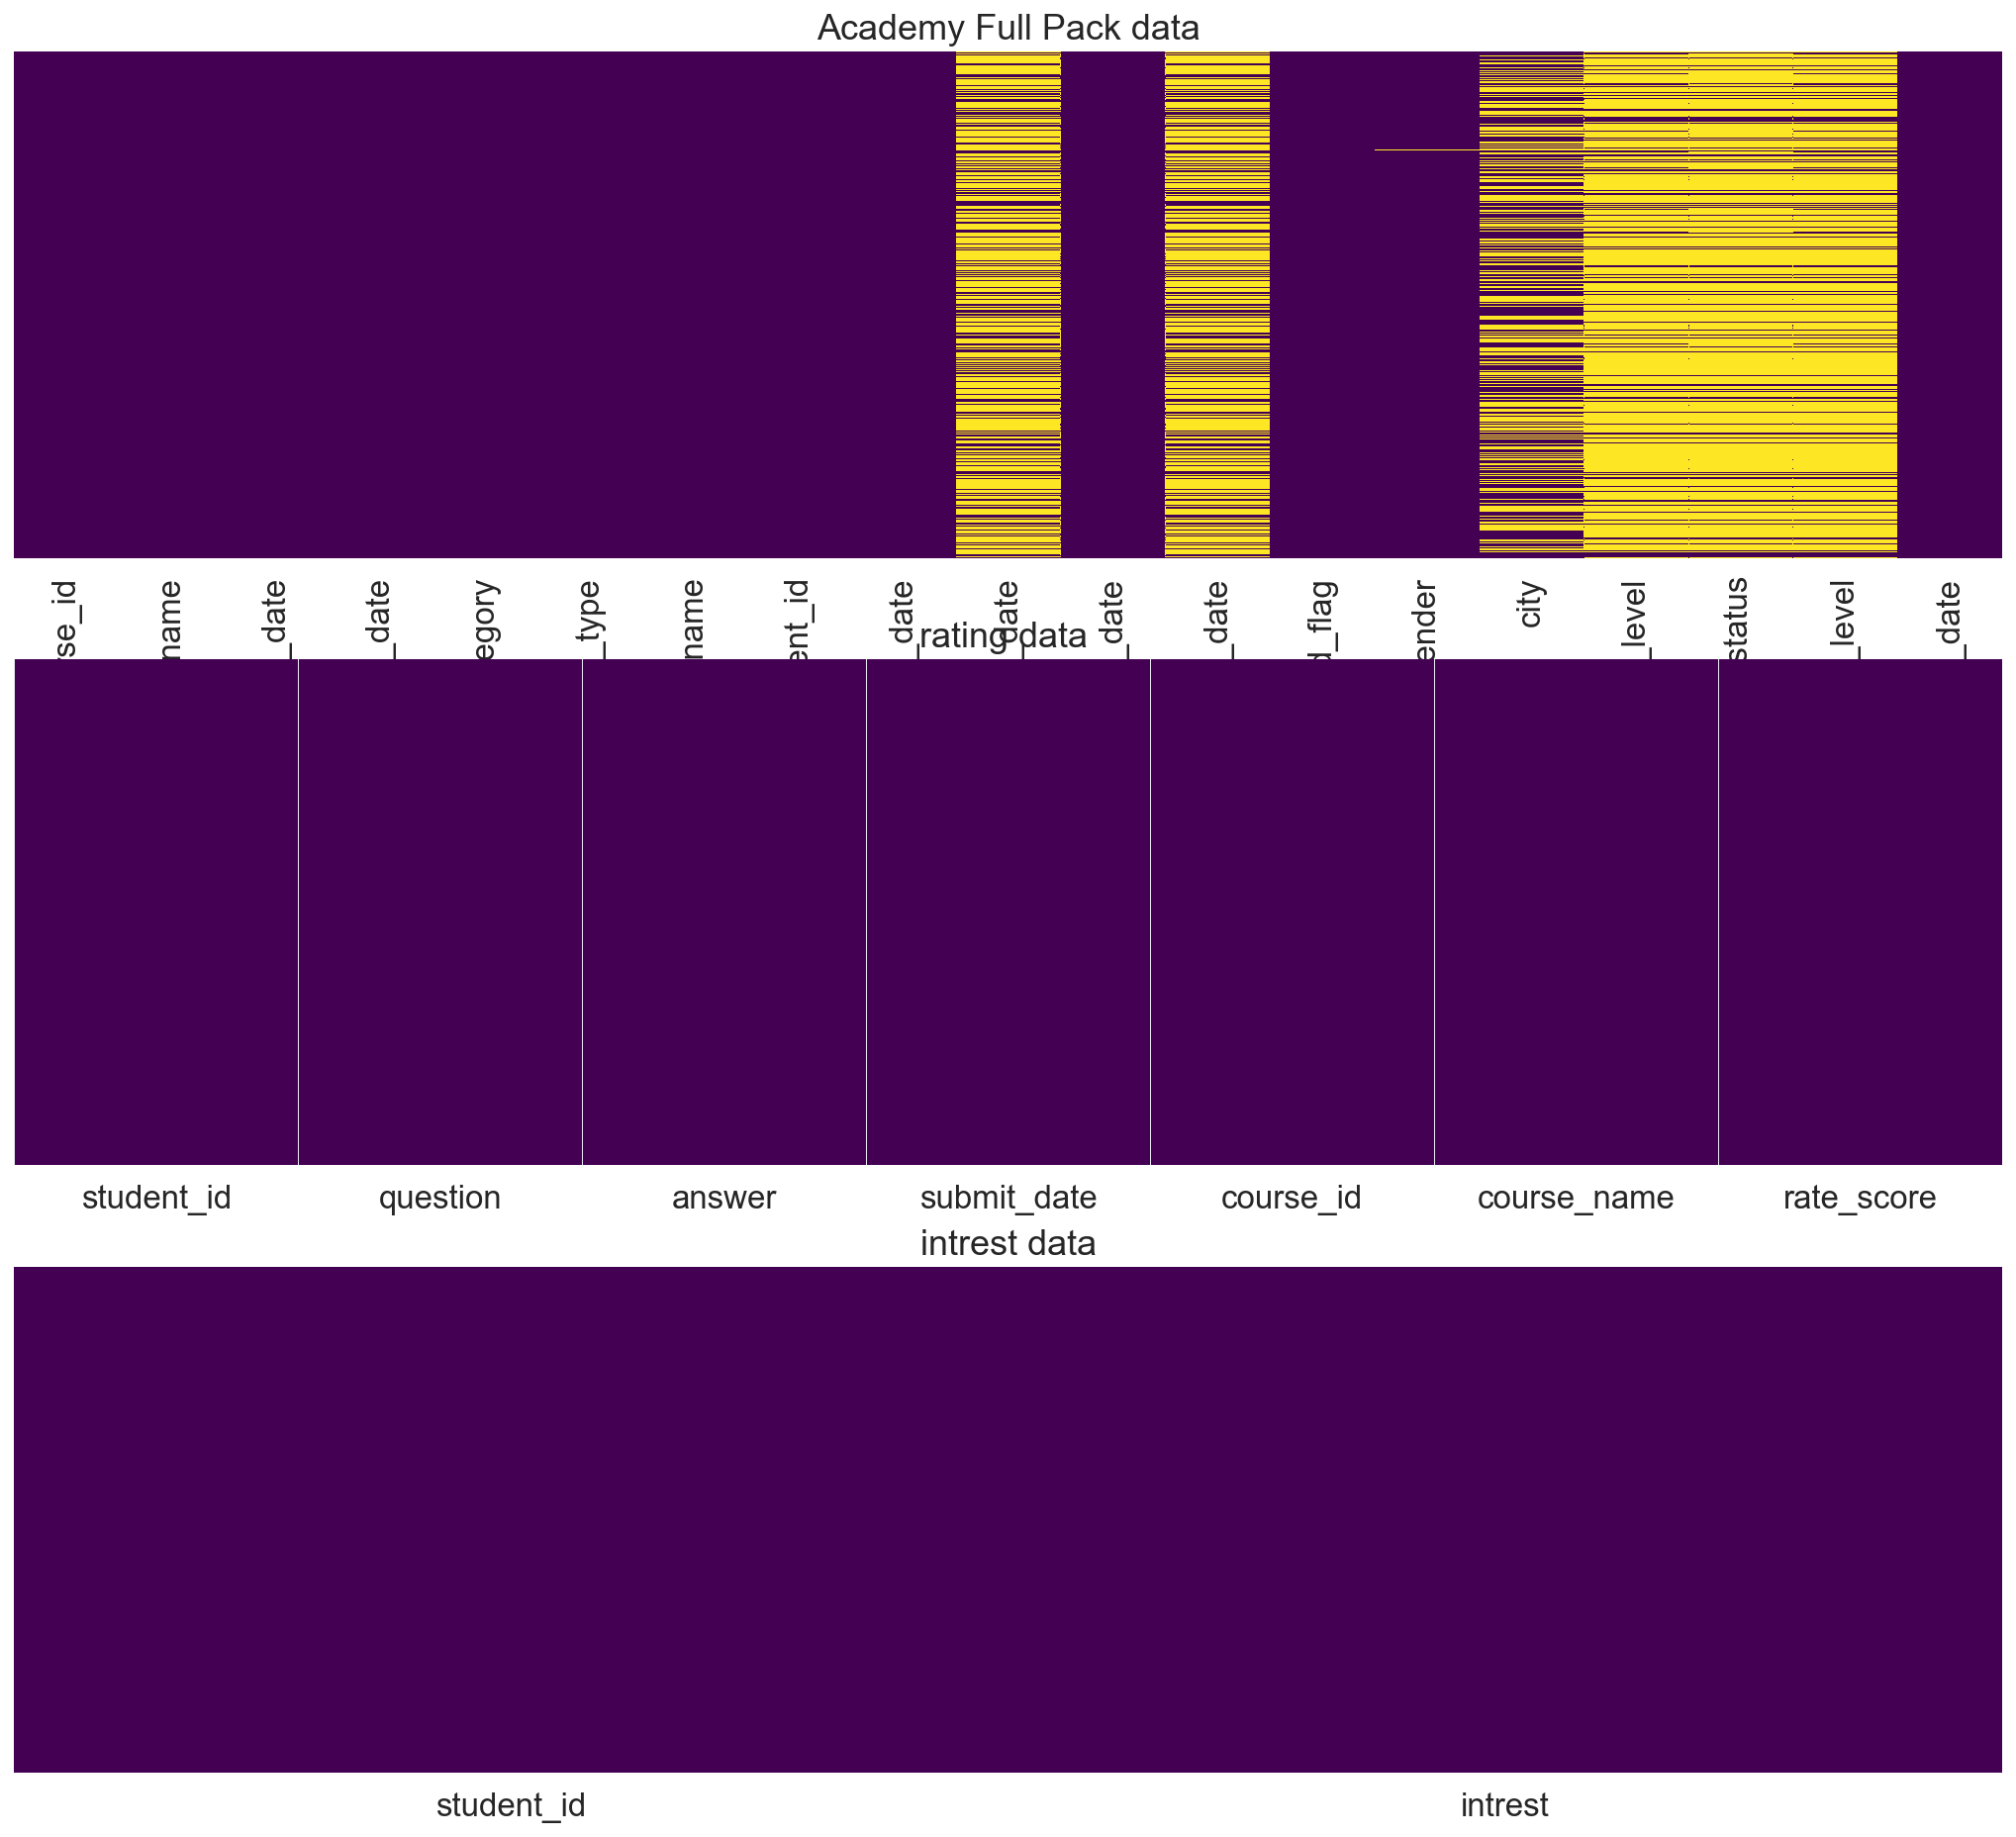

In [19]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (18, 16));

# train data 
sns.heatmap(df.isnull(), yticklabels=False, ax = ax[0], cbar=False ,cmap='viridis')
ax[0].set_title('Academy Full Pack data')

# test data
sns.heatmap(rate.isnull(), yticklabels=False, ax = ax[1], cbar=False , cmap='viridis')
ax[1].set_title('rating data ');

sns.heatmap(intrest.isnull(), yticklabels=False, ax = ax[2], cbar=False ,cmap='viridis')
ax[2].set_title('intrest data')

In [20]:
df.isnull().sum()

course_id                    0
course_name                  0
course_start_date            0
course_end_date              0
course_category              0
course_type                103
student_name                 0
student_id                   0
enrollment_date              0
completed_date           67477
row_enrollment_date          0
row_completed_date       67477
completed_flag               0
gender                     274
city                     42709
education_level          74375
job_status               76418
studnet_english_level    74375
register_date                0
dtype: int64

In [21]:
#delete the additionat columns

# df.drop(['row_enrollment_date','row_completed_date'] , axis=1 ,inplace= True)

In [22]:
df.columns

Index(['course_id', 'course_name', 'course_start_date', 'course_end_date',
       'course_category', 'course_type', 'student_name', 'student_id',
       'enrollment_date', 'completed_date', 'row_enrollment_date',
       'row_completed_date', 'completed_flag', 'gender', 'city',
       'education_level', 'job_status', 'studnet_english_level',
       'register_date'],
      dtype='object')

In [23]:
df['gender'].unique()

array(['ذكر', 'male', 'female', 'انثى', nan], dtype=object)

In [24]:
sex={'male': 'ذكر' , 'female': 'انثى', 'nan':np.nan}

df['gender'] = df['gender'].map(sex)

In [25]:
df['gender'].unique()

array([nan, 'ذكر', 'انثى'], dtype=object)

In [26]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".",":","/",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","p","n","b","s","p","b","r"]

for char in spec_chars:
    rate['question'] = rate['question'].str.replace(char, ' ')


In [27]:
df.studnet_english_level.mode()

0    متوسط
dtype: object

In [28]:
df[df['gender'].isnull()]['student_name'].unique()

array(['محمد', 'عبدالله', 'تغريد', 'عبدالوهاب', 'بندر', 'عبدالعزيز',
       'ميسون', 'فيصل', 'فرج', 'جواهر', 'ابراهيم', 'ناصر', 'عبدالرحمن',
       'عماد', 'علي', 'احمد', 'ماجد', 'نوره', 'هيثم', 'عبدالاله', 'فهد',
       'خالد', 'طه', 'سعود', 'سامي', 'سليمان', 'نوال', 'سعيد', 'علاء',
       'طلال', 'سلطان', 'سعد', 'روعه', 'مزنه', 'عمار', 'بسمه', 'هاني',
       'ياسر', 'نجود', 'صيته', 'مي', 'منى', 'أيمان', 'امل', 'مشعل',
       'حماد', 'فاطمه', 'متعب', 'عادل', 'رياض', 'ايمان', 'كمال', 'تهاني',
       'منوه', 'لافي', 'وفاء', 'دعاء', 'حسين', 'ماهر', 'ابتهال', 'هدى',
       'AHMAD', 'عثمان', 'فوزي', 'ساميه', 'مريم', 'نوف', 'سناء', 'اميره',
       'ناهد', 'منال', 'تركي', 'ايمن', 'رباب', 'وليد', 'عصام', 'قذاف',
       'عبدالمجيد', 'السكوت', 'فايزه', 'حبيب', 'يحيى', 'منصور', 'مازن',
       'آحمد', 'جوزاء', 'حامد', 'ندى', 'رغده', 'اشرف', 'ملاك', 'أمير',
       'سعديه', 'بدر', 'حاتم', 'أفنان', 'لؤى', 'موسى', 'نايف', 'صالح',
       'حنين', 'نواف', 'زيد', 'مرامي', 'نور', 'رائد', 'بخيت', 'عبدالغني

In [29]:
girls=['ناديه','ريم','حنين','مرامي', 'نور','سعديه', 'أفنان','جوزاء', 'فايزه','ناهد', 'منال', 'رباب', 'ساميه', 'مريم', 'نوف', 'سناء', 'اميره','منوه','وفاء', 'دعاء', 'بسمه', 'روعه', 'مزنه',
       'تغريد', 'ميسون', 'جواهر', 'نوره', 'نوال' , 'نجود', 'صيته', 'مي', 'منى', 'أيمان', 'امل', 'فاطمه', 'ايمان', 'تهاني' 'ابتهال', 'هدى', 'ندى',
       'ملاك','شروق', 'نجلاء', 'ريهان','عهد','هاجر', 'أسمهان', 'ناديا','اشواق', 'غصون', 'كامله', 'دانه', 'شماء', 'سماح', 'فوزيه','عبير','اريج', 
       'عهود', 'جنه', 'هتون', 'العنود','جيهان', 'رانيه',  'مشاعل','ابتسام', 'ساره', 'ياسمين', 'ثريا','هيله', 'زينب', 'سميه', 'هنادي', 'خلود','مرام',
       'عائشه','عفه', 'رولا','جميله', 'حصه', 'حياة', 'هتان', 'شريفه', 'منار', 'هيا', 'باسمه', 'رحاب', 'نزيهه', 'دنيا',  'الهام', 'عطاف', 'لمياء',
       'الجوهره','ورده','وجدان', 'الهنوف', 'هبه', 'لميس', 'هند', 'شفاء', 'وضحه', 'صالحه', 'هناء', 'أريج', 'هيفاء', 'بروجي', 'رقيه', 'أحلام', 
       'بدور','حنان', 'بشاير', 'هياء', 'بدريه','مها', 'رنا', 'رشاء', 'يسري', 'شمعه', 'سميره', 'هلا', 'أمل','ليلي', 'هديل', 'غزيل', 'عتيقه','بشرى', 'سها',
       'أماني', 'زهور', 'عوده', 'فزه','سماهر',  'رضاء','خالديه', 'خوله', 'ابرار', 'فيحاء', 'حميده', 'عباير','رضاء', 'نهى',  'ظبيه', 'سماره', 'خديجه',
       'عاطف', 'ظيف', 'زهراء', 'اماني', 'فاتن', 'معيضه', 'وصايف','هيلاء', 'اروى', 'بتلاء', 'منيره', 'آيه','امال', 'داليا', 'نافله', 'غاده', 'رحمه',
       'نداء', 'أسماء', 'عواطف', 'عزه',  'بشائر','ريما', 'وداد','مني', 'شذى', 'ليلى', 'حليمه', 'هنوف', 'الجازي', 'سمر', 'عائشة', 'نجاح',
       'نجمه', 'آلاء', 'مضاوي', 'الين', 'أميره','نحاء', 'فهده', 'احلام','غدير','رهام', 'صفيه', 'شعاع', 'نجاه','سلوى', 'بيان', 'حياه', 'تراحيب',
       'نبيله', 'بيضا', 'فريده', 'وعد', 'راويه', 'دلال', 'أنوار', 'امنيه','ذكرى', 'موضى', 'سحر', 'آمل', 'أشواق', 'ونس', 'نشوى', 'شدى',
       'جوهره','يارا', 'لولوه', 'ندي','نسرين', 'نوير', 'غزل', 'خزنه','حييه', 'عزيزه','انهار', 'سلمى', 'عطيه', 'رؤى', 'مرشده', 'غاليه',
       'امنه', 'تسامح','انفال',  'لنا', 'منيفه','عذاري','اسراء', 'سهام', 'امينه', 'حفصه', 'شيهانه', 'سوسن', 'لولوة', 'مدى', 'جنان', 'سندس',
       'شكرى', 'شموخ', 'ديمه', 'موده','نسمه', 'موضي', 'رزنه','اشجان', 'أمجاد', 'هدي', 'علياء', 'رشا','أثير','زهره', 'الاميره', 'نجوى',
       'متعه', 'ميساء','سعاد', 'الاء', 'لماء', 'لمى', 'فائزه', 'وزنه', 'لطيفه',  'شيماء', 'شهد', 'أمنيه','وضحى', 'سهى', 'شيخه', 'انتصار',
       'حمسه','آمنه', 'شوق', 'روان', 'ولاء', 'سجى', 'بثينه', 'سارة','زين','شهره', 'مروه', 'رندا', 'عروب',  'أنهار', 'نهاد', 'رلى',
       'زبنه', 'سهو', 'دانيه', 'روى', 'رزق','جمايل','ضحى', 'كتلاء', 'معاني', 'رزان','سراء', 'صفاء', 'مهره', 'داليه', 'عيشه', 'عجب',
       'افنان','حوراء', 'اسماء', 'سيده', 'سخيه', 'مظاهر', 'أزهار', 'عوضه', 'كوثر', 'رنيم', 'رانيا', 'مزينه', 'وميض', 'سلطانه', 'سجاء',
       'اروي', 'ضياء', 'عاليه', 'نعمه', 'اثير', 'نيهال','ايثار','امجاد','ندا', 'بتول', 'هاله', 'مناهل', 'لينا','بنان', 'زبره', 'ربى', 'ليال',
       'لبابه', 'غلبه', 'لبنى', 'أوصاف', 'سميحه', 'غيداء', 'نهال','عليه', 'اهداب', 'أميال', 'أميمه', 'جوري', 'لولو', 'فنون', 'امواج',
       'ملوك', 'اسيل', 'اسرار', 'سارا','طرفه', 'أميرة','دارين', 'اضواء', 'انوار', 'يسرى', 'نورا', 'عفريه', 'خديجة' , 'حسناء',  'لما',
       'مزهر', 'جود','فدى', 'انيسه', 'روابي','رناء','فرح', 'لجين', 'بارعه', 'نها', 'أروى', 'ألاء', 'اسمهان','مرح', 'عذوق','طيف'
       , 'اكرام', 'ميهاف', 'غلا', 'نواره', 'رغد', 'رهف', 'زها', 'غدي','وجود', 'رويده', 'ريناء', 'شذا', 'غادة', 'رازان', 'اضوى'
       , 'هويدا', 'شادن','فيروز', 'مهاء', 'زريفه', 'ماجده', 'افراح','زينه', 'مجد', 'البندري', 'وئام', 'فلوه', 'رجاء','ميمونه', 'روزان'
       ,'كواكب', 'رند', 'دانا', 'صلح', 'ايفاد', 'فاديه', 'ريانه', 'أصايل', 'براءه', 'ميعاد', 'أفراح', 'منيرة', 'جوهر', 'يمنى'
       , 'رنين','سديم','فتون', 'رفال', 'حاليه', 'اسيا', 'ريناد',  'البتول','بسما', 'دنى', 'المها', 'لميا', 'وريف', 'حصة', 'مثايل'
       , 'رويدا', 'جمان', 'نماء','فضه', 'مزون', 'أسرار', 'اميمه', 'الزهراء', 'هيام','جمانه', 'ضي', 'أفياء', 'ملحه', 'ميرفت'
       , 'ثرياء', 'ابتهاج', 'سراب', 'وجد','أبرار', 'رواء', 'هيلي', 'يامي', 'في', 'حمده', 'رناد','نجد', 'افياء', 'سامية'
       , 'ريماز', 'نضال', 'ليان', 'روف','رواسي', 'عليا', 'ريوف', 'محبوبه','عبيده', 'الجوهرة', 'تيسير', 'رقية', 'حوريه'
       , 'ايات', 'تواصيف','صافيناز', 'ثروت', 'نادرة', 'نورهان', 'دوري', 'مرفت','حسنى', 'ربا', 'ثويبه','رغده']
boys= ['محمد', 'عبدالله', 'عبدالوهاب', 'بندر', 'عبدالعزيز','فيصل', 'فرج', 'ابراهيم', 'ناصر', 'عبدالرحمن','عماد', 'علي', 'احمد', 'ماجد', 'هيثم', 'عبدالاله', 'فهد','خالد', 'طه', 'سعود', 'سامي', 'سليمان', 'سعيد', 'علاء','طلال', 'سلطان', 'سعد', 'عمار', 'عفاف', 'هاني','ياسر', 'مشعل', 'حماد', 'متعب', 'عادل', 'رياض','زاهد','معبر', 'كمال','لافي', 'علا', 'حسين', 'ماهر','AHMAD', 'عثمان', 'فوزي','تركي', 'ايمن', 'وليد', 'عصام', 'قذاف','عبدالمجيد', 'السكوت', 'حبيب', 'يحيى', 'منصور', 'مازن','آحمد',  'حامد', 'اشرف', 'أمير','بدر', 'حاتم', 'لؤى', 'موسى', 'نايف', 'صالح','نواف', 'زيد', 'رائد', 'بخيت', 'عبدالغني','وسام', 'يعقوب', 'جمال', 'يحي','حسن','مضيع',  'محمدمدني', 'مستور', 'جعفر', 'عامر', 'رامى','ثامر', 'مؤيد', 'ناهض', 'مبارك', 'مشبب', 'عبداللطيف','فرحان', 'نورالدين', 'محمدفؤاد','سامى', 'ممدوح', 'أمان', 'طارق', 'سلمان', 'مروان','فؤاد', 'معاذ', 'رشيد', 'بشير', 'سويد','أحمد', 'باسم', 'حمزه', 'عبدالملك', 'شاكر', 'عبدالكريم', 'عيد','عقيل', 'حمدان', 'منير', 'غازي', 'تقي','اسامه', 'عباس', 'شريف', 'غسان', 'فريد','زكي', 'فالح', 'مفيد', 'سالم','انور', 'سامر', 'جاسر', 'عمر', 'مهدي', 'راشد','وائل', 'جابر','نبيل', 'حاجي', 'هاشم', 'عبدالجليل','مرتضى', 'طفول', 'بلال', 'بركات','جلال', 'ولي', 'هديف', 'حمد','عاصم', 'اسماعيل', 'نادر', 'أقبال', 'أيمن', 'حسام', 'صقر','مسفر', 'فايز', 'عبدالمحسن','عواد', 'زهير', 'عائض','الحميدي', 'يوسف', 'غالب','دايل', 'جمعان', 'عبد', 'هادي','بسام','رافع', 'صلاح','عوض', 'وديع','عدنان', 'وجدي', 'فراس', 'مقبول', 'ناشي', 'زيدان', 'عبدالرزاق', 'هنادى', 'نوران', 'رازى', 'فاطمة', 'سعيدان', 'ريهام','مداوي', 'عايد', 'نايل', 'بداح', 'زياد','عبدالمتعال',  'بكر', 'غريب', 'فواز','صباح', 'تميم', 'فانود', 'رؤف', 'ظافر','مجدي', 'بختان', 'مشهور', 'رامي', 'ريان', 'طاهر', 'شافي', 'جايز','عيضه', 'نافع', 'مصعب', 'سطام', 'ابكر', 'نجيب','انس', 'مشاري','معجب', 'على', 'عويض', 'حمود', 'يزيد','طلق', 'حميد', 'راكان', 'حيدر','اسعد', 'عبدالحكيم', 'نعمت', 'معيض', 'ذاكر','معتز', 'عبدالمالك', 'عبدالرحيم', 'نعمات', 'أنس', 'طالع', 'فارس','منتظر',  'علوي', 'امين', 'أسامه', 'نهار','سمير', 'يونس', 'عيسى','عليان', 'خضر', 'رعد', 'المهند', 'داود', 'الحسن', 'مهنا','ناجي', 'عايض', 'جلمود', 'سراج', 'جبران','مهند', 'منصوربن', 'فاضل', 'مفرح','جميل','باسل', 'الحسين', 'آدم', 'مصلح', 'المعتصم','منصوره', 'عطاالله','صادق', 'دخيل',  'سعدون',
       'أبراهيم','عبدالأله', 'عارف',  'عيظه','هذال', 'هشام', 'مرعي', 'تركى', 'ملفي', 'مطلق','سجاد', 'سلامه', 'فائز', 'سيف', 'جودي', 'عزام', 'مانع','عبدالهادي', 'موسي', 'راجي', 'ياسين', 'قبلان','عبدالااله', 'قاسم', 'جاسم', 'مونس','محفوظ', 'لؤي','سهيل', 'سهي',  'البراء','آيمن', 'مساوي', 'مطر','أمجد', 'يحى', 'جهاد',  'فادي','عبدالسلام','ادريس', 'عبدالغفور', 'موفق', 'شباب', 'اياد', 'مضيان','مخلد', 'ذيب','مجاهد', 'صابر', 'محسن','رمزي', 'عرار', 'زكريا', 'خلف','شوع', 'شيحان', 'ابوبكر', 'حبابي','ميسر', 'شبلان', 'مالك','ارشى', 'مرادي', 'مناحي','عبدالرازق', 'جارالله', 'سليم', 'مشعان','صفوان', 'ضيف', 'مقرن','صهيب', 'وقاش', 'فاهد','الوليد', 'مويد', 'عبدالمصلح', 'عايش', 'منتصر', 'خليفه',
       'لامي','عبده', 'عبدالحميد','غفران',  'محمود','عابد','يامن', 'عويد','فلاح', 'عمران', 'غايب','مصطفى', 'عبدالقادر','طراد', 'راجح','امجد',  'اسير','باهر', 'رسام', 'مرشد', 'نوح',
       'عمرو','مراد', 'سفيان', 'اسحاق','حازم', 'مساعد','دهام', 'اسامة', 'قابوس','شقران','اصيل', 'رفيع', 'عياد', 'ساري', 'يزن','معالي', 'سعدي',
        'أصيل', 'رامز', 'حذيفه', 'خيال','نائف','ضاحي','لزام', 'مريزيق', 'سويلم', 
       'وسيم', 'عزيز', 'ربيع', 'فهمي',
       'رمضان', 'ضيدان', 'عبود', 'منذر', 'مصطفي', 'الطيب', 'محمدنور',
       'هارون', 'محمدزياد', 'كامل', 'عبدالرؤوف', 'قصي',
        'تامر', 'عوني', 'شهاب', 'معتصم',  'رجب',
       'يـاسر', 'صدام', 'الصديق', 'بيومى']

In [30]:
#df[df['gender'].isnull()]['student_name'].unique()
for i in df[df['gender'].isnull()].index:
    if df['student_name'][i] in girls:
            df['gender'] = 'انثى'
    elif df['student_name'][i] in boys :
            df['gender'] = 'ذكر'
    else :
            continue


In [31]:
df['gender'].isnull().sum()

0

In [32]:
df.studnet_english_level.fillna('متوسط', inplace = True)

In [33]:
df.studnet_english_level.isnull().sum()

0

In [34]:
df.education_level.mode()

0    بكالوريوس
dtype: object

In [35]:
df.education_level.fillna('بكالوريوس', inplace = True)

In [36]:
df.education_level.isnull().sum()

0

by seeing to monshaat academy website  

In [37]:
df[df['course_type'].isnull()]['course_name'].unique()

array(['البرنامج التأهيلي للمستثمرين في تطبيقات التوصيل',
       'البرنامج التأهيلي لإنشاء مراكز ضيافة الأطفال',
       'Preparation for certified mentor', 'أساسيات التصدير',
       'Temporary Offline Course', 'Temporary Offline Course  9 April',
       'gen'], dtype=object)

In [38]:
df['course_type'].fillna('ملتقى إلكتروني مباشر', inplace = True)

 #### Determine how many observations are missing

In [39]:
df.isnull().sum()

course_id                    0
course_name                  0
course_start_date            0
course_end_date              0
course_category              0
course_type                  0
student_name                 0
student_id                   0
enrollment_date              0
completed_date           67477
row_enrollment_date          0
row_completed_date       67477
completed_flag               0
gender                       0
city                     42709
education_level              0
job_status               76418
studnet_english_level        0
register_date                0
dtype: int64

Text(0.5, 1.0, 'intrest data')

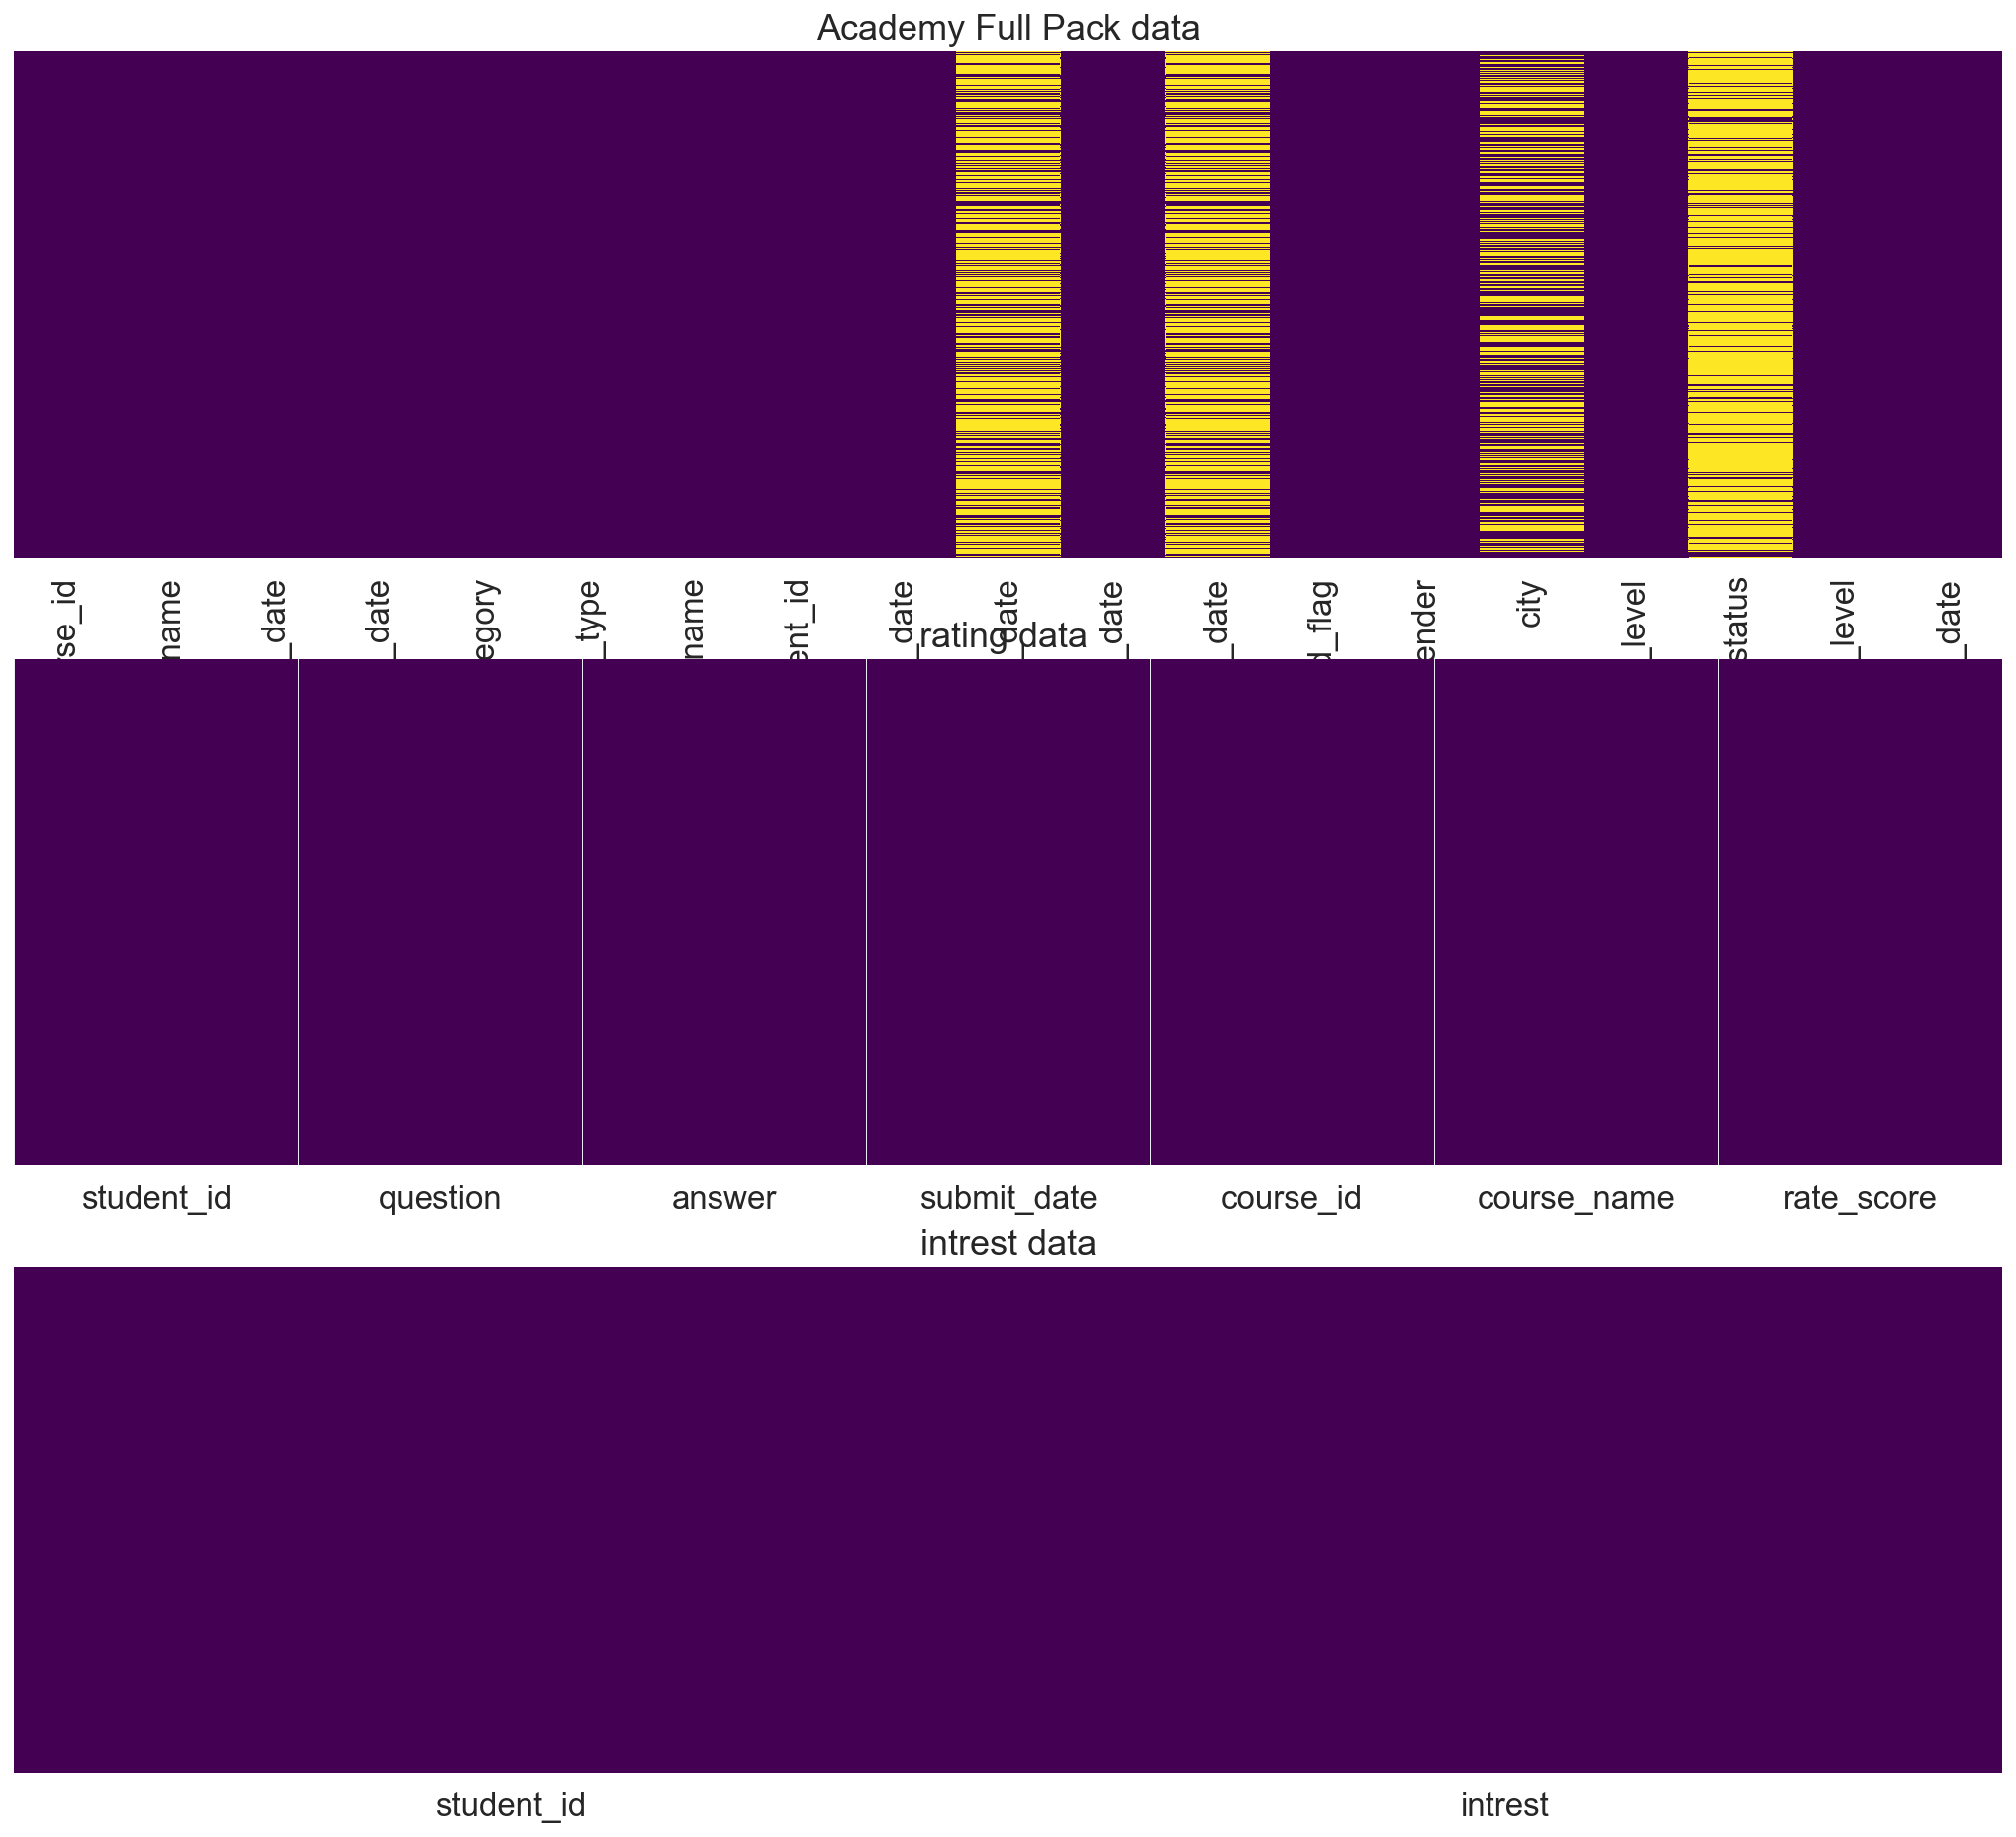

In [40]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (18, 16));

# train data 
sns.heatmap(df.isnull(), yticklabels=False, ax = ax[0], cbar=False ,cmap='viridis')
ax[0].set_title('Academy Full Pack data')

# test data
sns.heatmap(rate.isnull(), yticklabels=False, ax = ax[1], cbar=False , cmap='viridis')
ax[1].set_title('rating data ');

sns.heatmap(intrest.isnull(), yticklabels=False, ax = ax[2], cbar=False ,cmap='viridis')
ax[2].set_title('intrest data')

In [37]:
# df.to_csv('./data/Academy Full Pack clean.csv')

In [38]:
# rate.to_csv('./data/rate clean.csv')

In [39]:
# intrest.to_csv('./data/intrest clean.csv')

### Data Visualization

In [9]:
# import libraries
# 1
from bidi.algorithm import get_display
import arabic_reshaper
#2
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

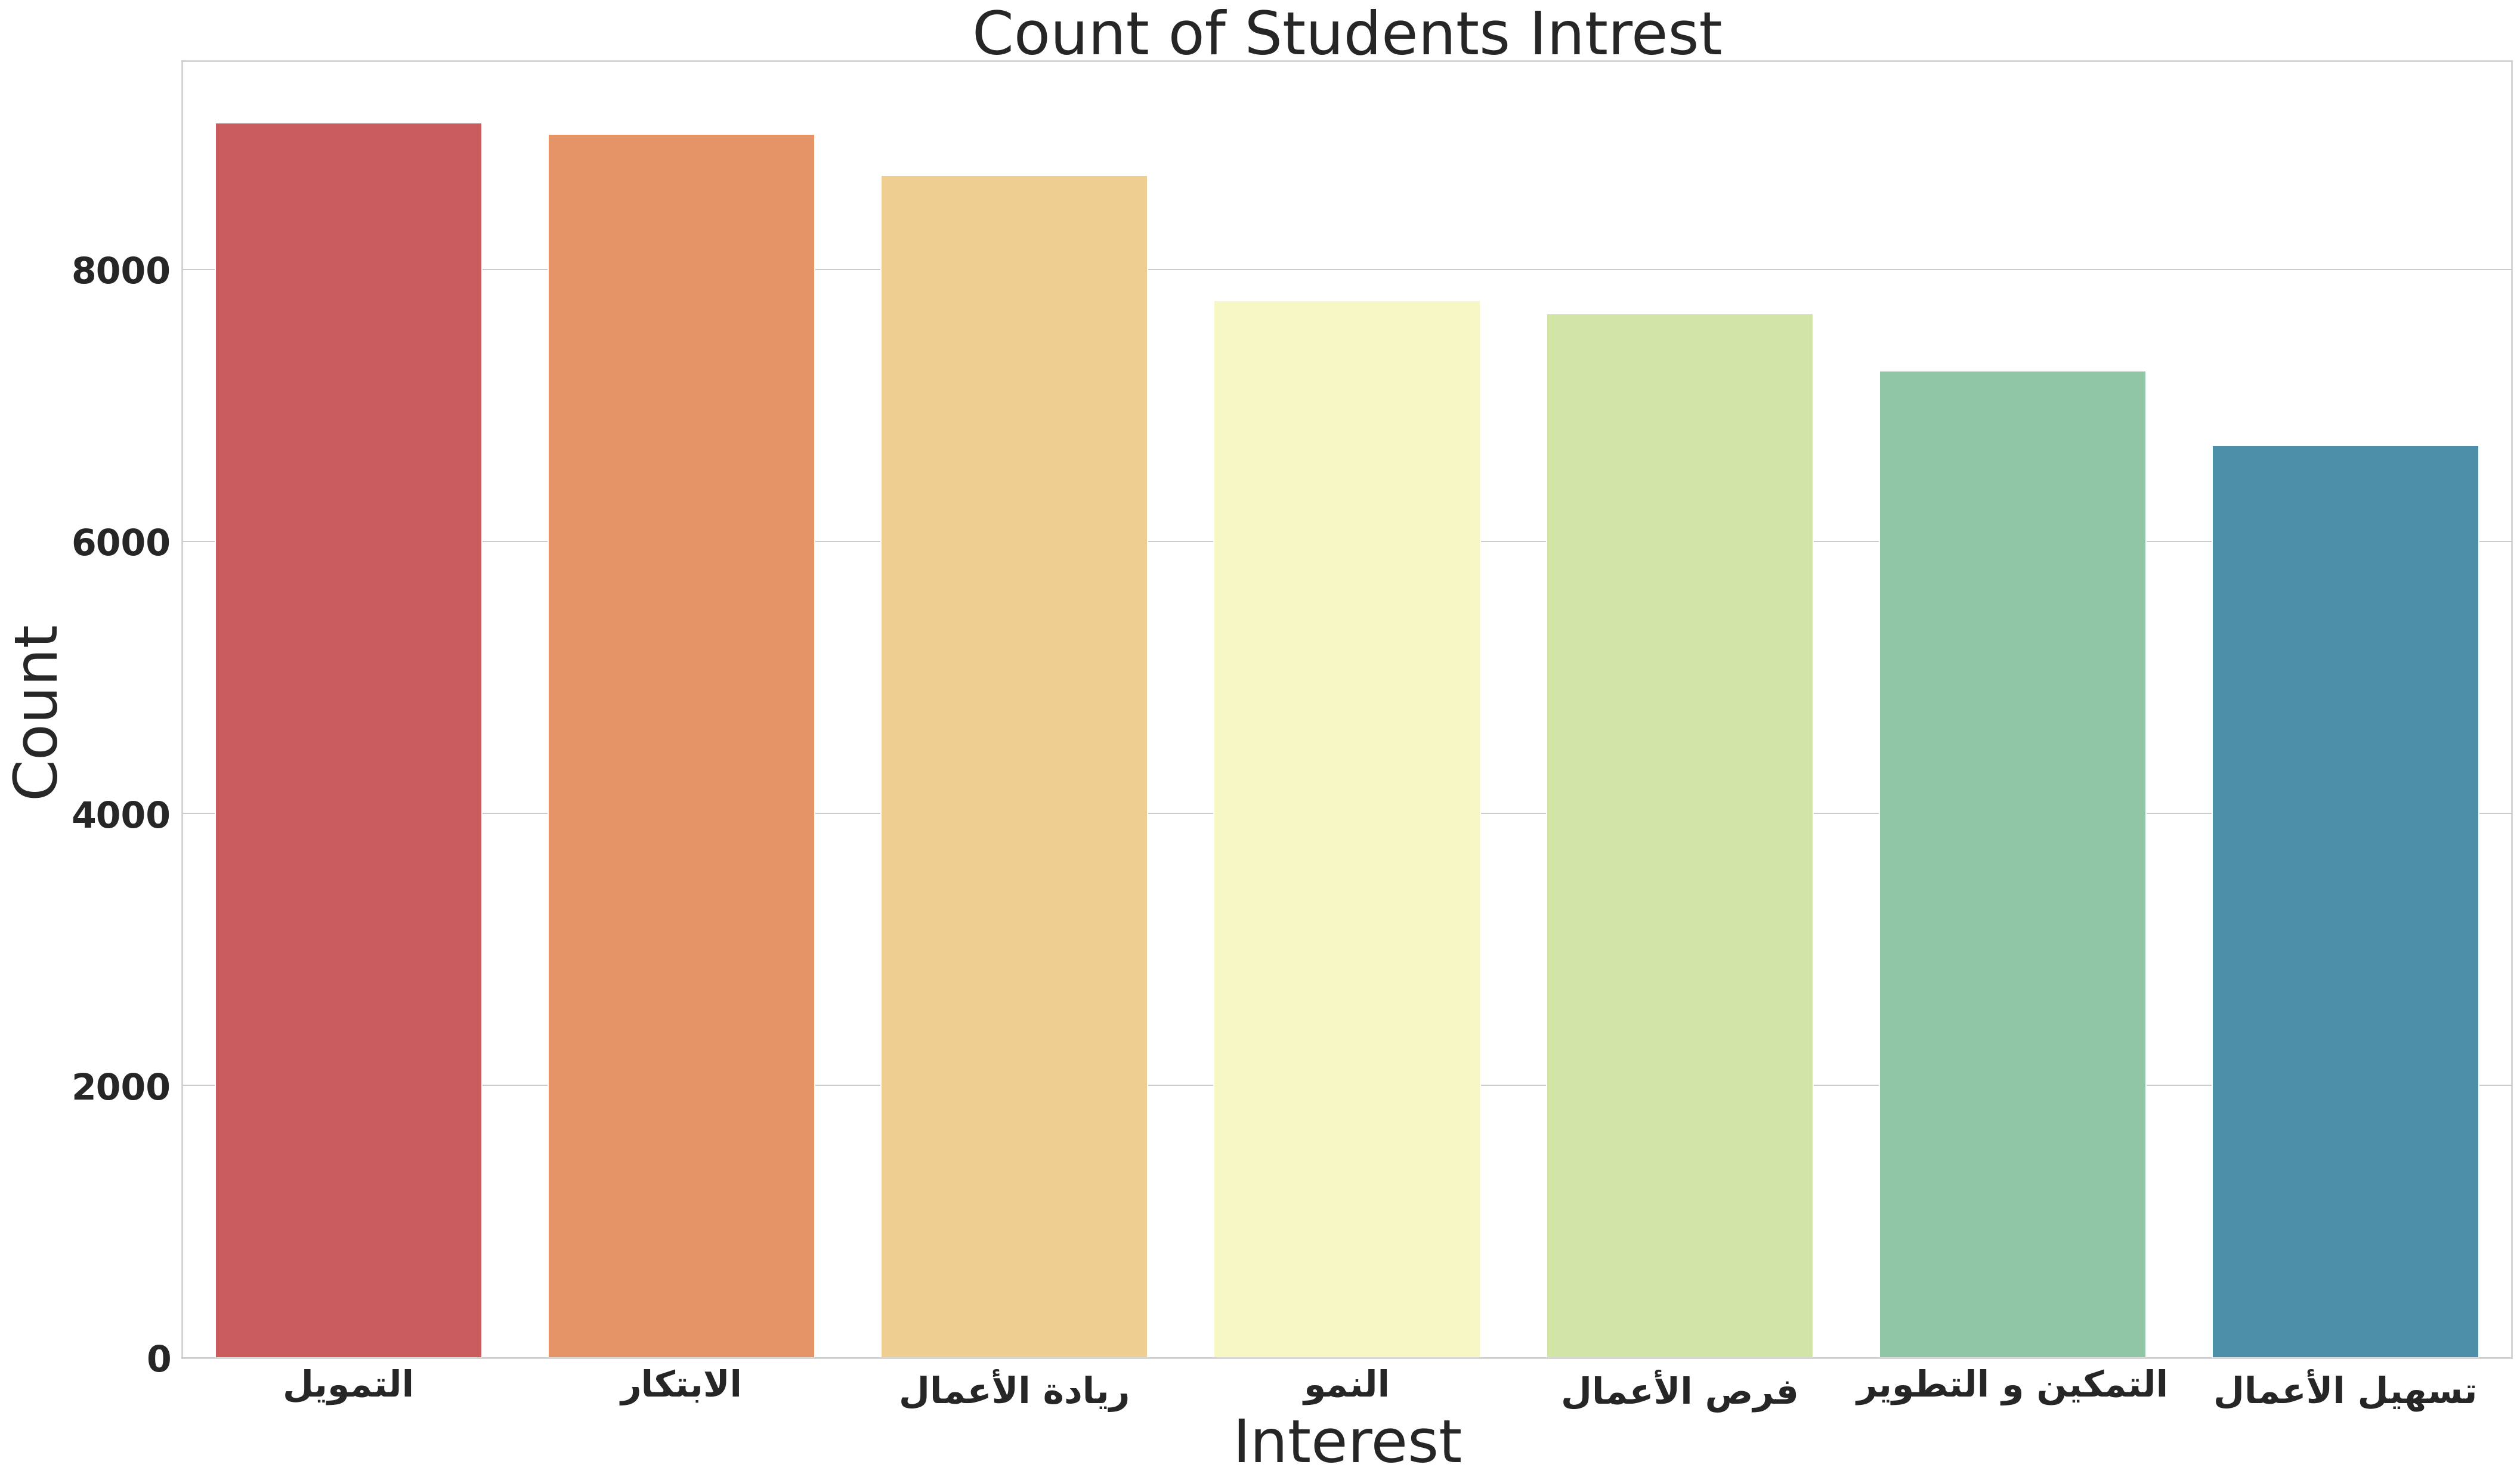

In [45]:
#Plot for Student intrest 
plt.figure(figsize=(35,20))
artext = [get_display(arabic_reshaper.reshape(i)) for i in intrest['intrest'].unique()]
ax=sns.barplot(artext ,intrest['intrest'].value_counts(), palette='Spectral')

plt.title('Count of Students Intrest', fontsize=50)
ax.set_xlabel('Interest', fontsize=50)
ax.set_ylabel('Count', fontsize=50)
plt.xticks(size=30)
plt.yticks(size=30)

plt.savefig('Interest_2.png')

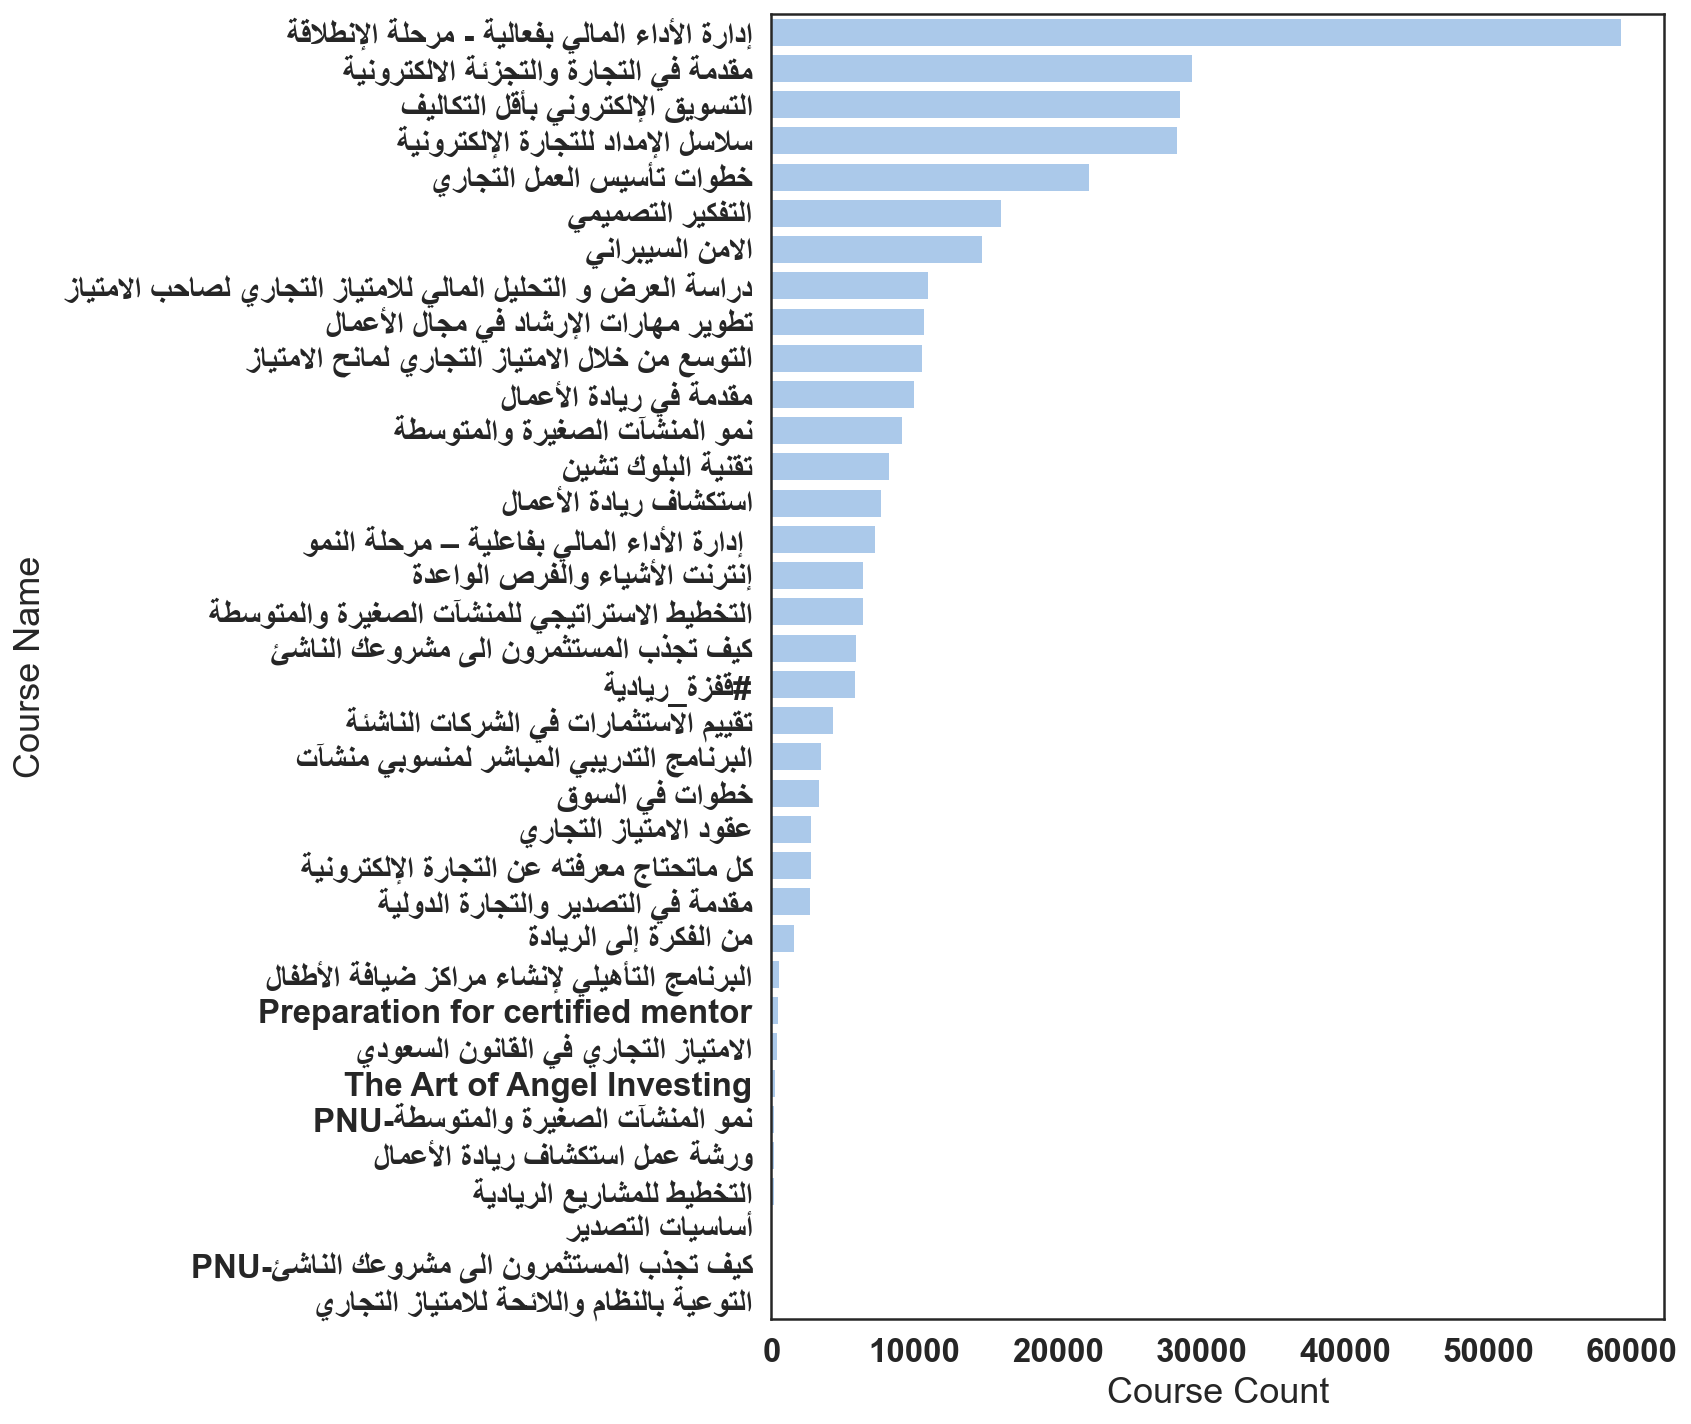

In [21]:
#Plot for Count of unique Course Name columns
f, ax = plt.subplots(figsize=(8, 12))
artext = [get_display(arabic_reshaper.reshape(i)) for i in df_sub3['course_name_x'].unique()]
sns.set_color_codes("pastel")
sns.set_style("white")
sns.barplot(x=df_sub3['course_name_x'].value_counts(), y=artext, data=df_sub3, color='b')
ax.set(ylabel='Course Name',xlabel="Course Count")
#plt.savefig('Courses.png', bbox_inches='tight')

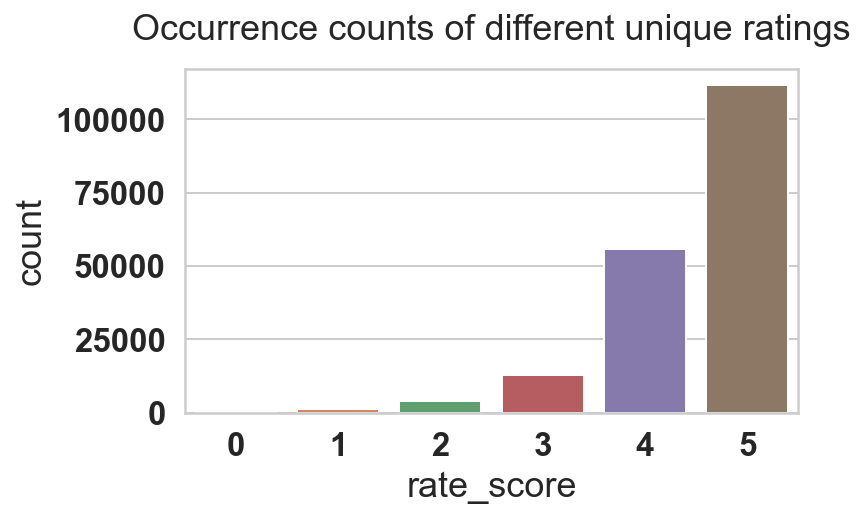

In [22]:
#Number of Rate score
sns.set(font_scale=1.5, style='whitegrid')
sns.countplot(rate['rate_score'])
plt.title('Occurrence counts of different unique ratings', y=1.05)
plt.tight_layout()
#plt.savefig('Rate.png', bbox_inches='tight')

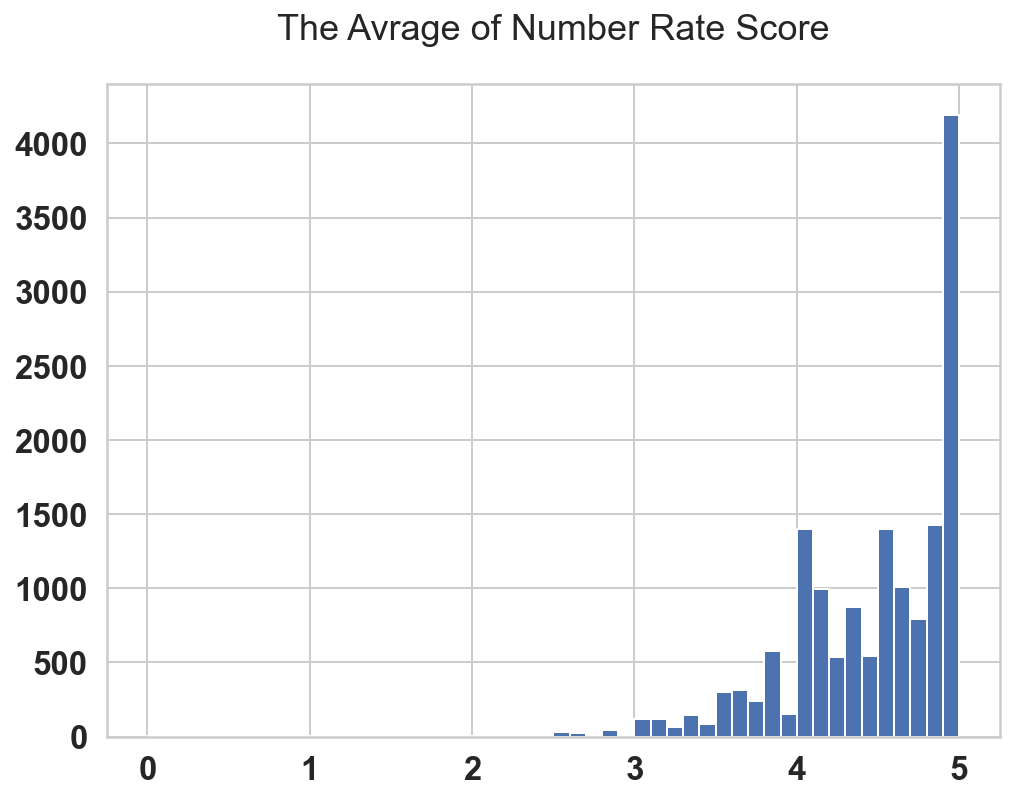

In [23]:
#Mean of Rate score
Mean = rate.groupby(by="student_id",as_index=False)['rate_score'].mean()

plt.figure(figsize=(8,6))
plt.title('The Avrage of Number Rate Score', y=1.05)
plt.rcParams['patch.force_edgecolor'] = True
Mean['rate_score'].hist(bins=50)
#plt.savefig('Rate_score.png', bbox_inches='tight')

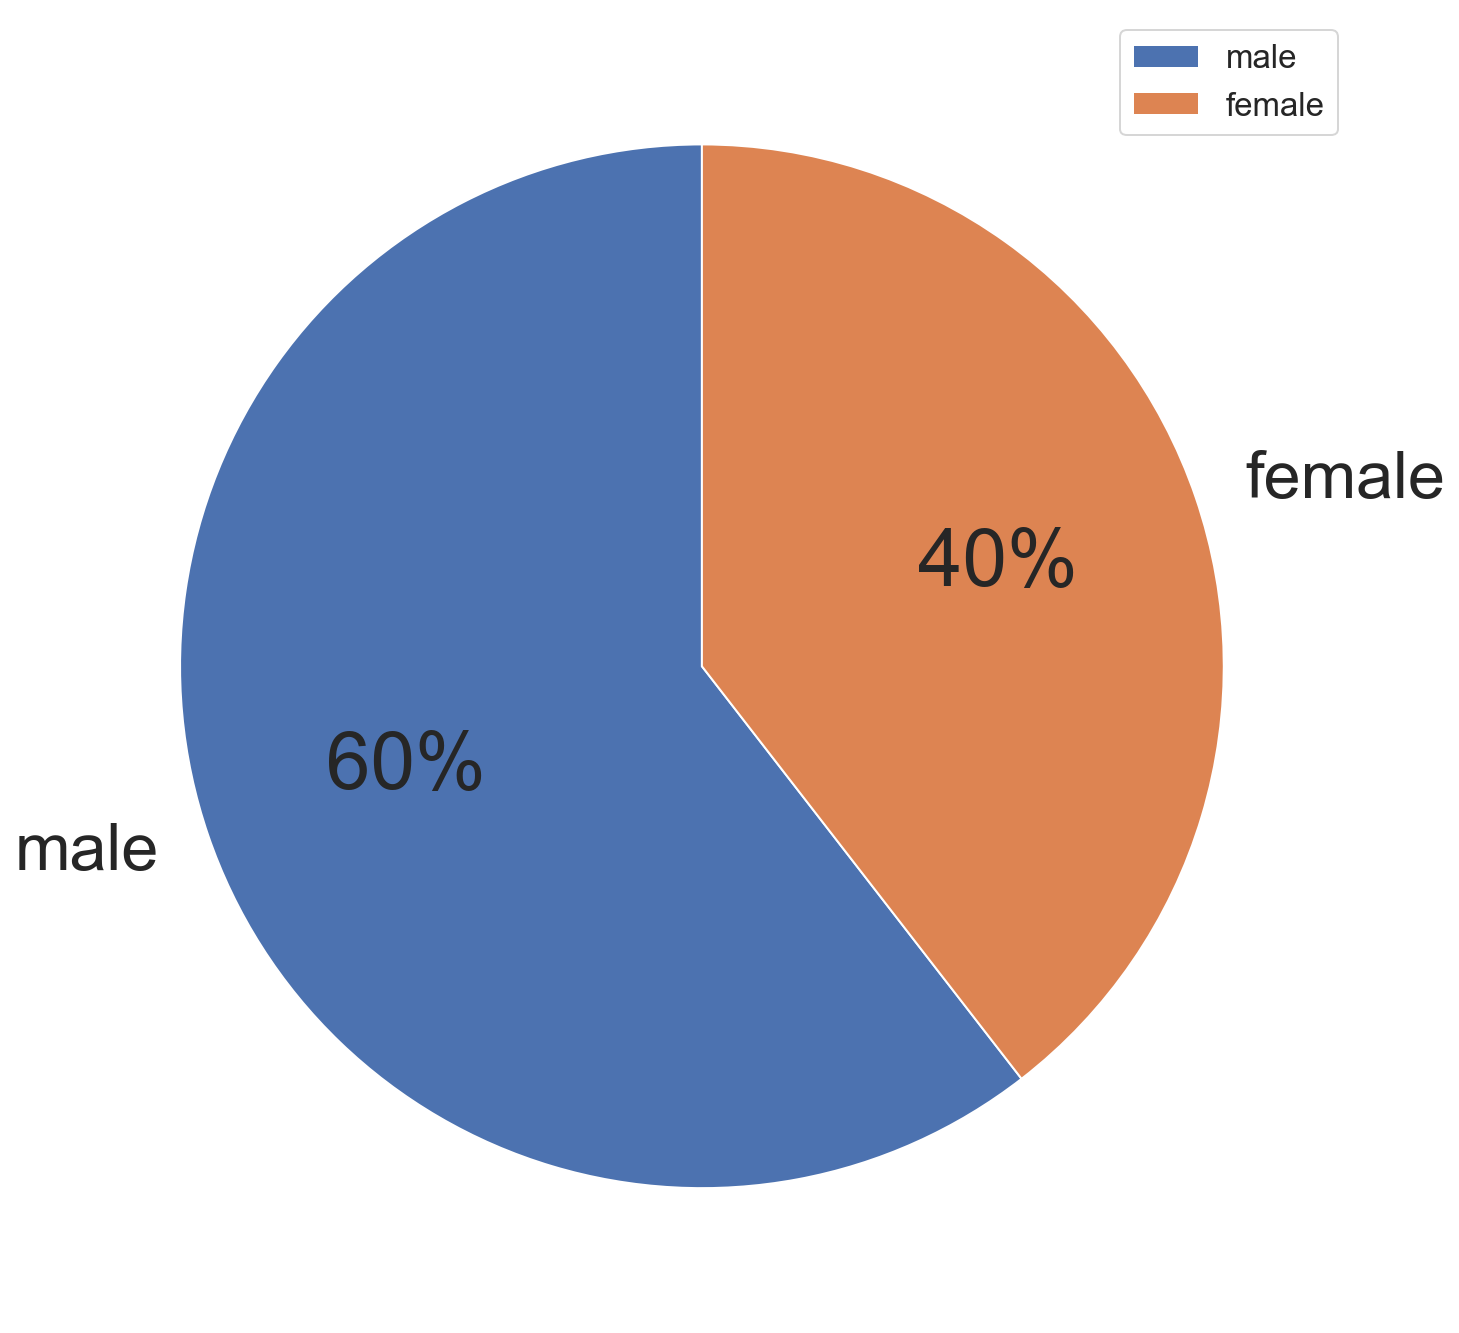

In [12]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['male','female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(df.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

### Simple Model 

In [41]:
# Count the number of ratings:
ratings_count = rate.groupby('course_id', as_index=False)['rate_score'].count()

# Sort the places based on the number of ratings
ratings_count.sort_values(by='rate_score', ascending=False).head()

,course_id,rate_score
11,61,49203
1,35,18662
2,36,17171
14,64,13982
7,50,12945


In [42]:
most_rated_place = pd.DataFrame([61, 64, 36, 35, 50], index=np.arange(5), columns=['course_id'])
summary = pd.merge(most_rated_place, df, on='course_id' ,how='outer')


In [43]:
df['course_name'].describe()

count               95623
unique                 51
top       الامن السيبراني
freq                15800
Name: course_name, dtype: object

---

In [44]:
# We will use the movies dataset and first get the user data
# This dataset has the user_id, the movie they reviewd and the rating they gave.
df_m = df[['student_id','course_id','course_name']]
df_m['rate_score'] = rate['rate_score']
df_m[['course_id','course_name','rate_score']].head(3)

,course_id,course_name,rate_score
0,48,نمو المنشآت الصغيرة والمتوسطة,4
1,36,التسويق الإلكتروني بأقل التكاليف,3
2,36,التسويق الإلكتروني بأقل التكاليف,5


In [45]:
# we just need the movie id and the title
df_m.groupby('course_id')['rate_score'].count().sort_values(ascending=False).head()

course_id
61    15800
36     9742
35     9001
64     6105
34     5180
Name: rate_score, dtype: int64

In [46]:
df_m[df_m['course_id']==61 ]['course_name'].unique()

array(['الامن السيبراني'], dtype=object)

---

In [47]:
rating_crosstab = df_m.pivot_table(values='rate_score', index='student_id', columns='course_name', fill_value=0)

In [48]:
rating_crosstab.shape

(36675, 51)

In [49]:
X = rating_crosstab.T

In [50]:
X.shape

(51, 36675)

In [51]:
from sklearn.decomposition import TruncatedSVD

In [52]:
SVD = TruncatedSVD(n_components=12, random_state=42)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(51, 12)

In [53]:
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(51, 51)

In [54]:
# We start by generating a movie names index
course_names_rating = rating_crosstab.columns
course_names_rating

Index([' إدارة الأداء المالي بفاعلية – مرحلة النمو', '#قفزة_ريادية',
       '30_march_demo_offline', 'PNU-كيف تجذب المستثمرون الى مشروعك الناشئ',
       'PNU-نمو المنشآت الصغيرة والمتوسطة', 'Preparation for certified mentor',
       'Temporary Offline Course', 'Temporary Offline Course  9 April',
       'The Art of Angel Investing', 'gen', 'أساسيات الأعمال الدولية',
       'أساسيات التصدير', 'إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة',
       'إنترنت الأشياء والفرص الواعدة', 'استخدام شبكة لينكدان ',
       'استكشاف ريادة الأعمال', 'الإدارة الافتراضية', 'الامتياز الافتراضي',
       'الامتياز التجاري في القانون السعودي', 'الامن السيبراني',
       'البرنامج التأهيلي لإنشاء مراكز ضيافة الأطفال',
       'البرنامج التأهيلي للمستثمرين في تطبيقات التوصيل',
       'البرنامج التدريبي المباشر لمنسوبي منشآت', 'التحول للامتياز التجاري',
       'التخطيط الاستراتيجي للمنشآت الصغيرة والمتوسطة',
       'التخطيط للمشاريع الريادية', 'التسويق الإلكتروني بأقل التكاليف',
       'التسويق من خلال وسائل ال

In [55]:
course_list = list(course_names_rating)
course_list

[' إدارة الأداء المالي بفاعلية – مرحلة النمو',
 '#قفزة_ريادية',
 '30_march_demo_offline',
 'PNU-كيف تجذب المستثمرون الى مشروعك الناشئ',
 'PNU-نمو المنشآت الصغيرة والمتوسطة',
 'Preparation for certified mentor',
 'Temporary Offline Course',
 'Temporary Offline Course  9 April',
 'The Art of Angel Investing',
 'gen',
 'أساسيات الأعمال الدولية',
 'أساسيات التصدير',
 'إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة',
 'إنترنت الأشياء والفرص الواعدة',
 'استخدام شبكة لينكدان ',
 'استكشاف ريادة الأعمال',
 'الإدارة الافتراضية',
 'الامتياز الافتراضي',
 'الامتياز التجاري في القانون السعودي',
 'الامن السيبراني',
 'البرنامج التأهيلي لإنشاء مراكز ضيافة الأطفال',
 'البرنامج التأهيلي للمستثمرين في تطبيقات التوصيل',
 'البرنامج التدريبي المباشر لمنسوبي منشآت',
 'التحول للامتياز التجاري',
 'التخطيط الاستراتيجي للمنشآت الصغيرة والمتوسطة',
 'التخطيط للمشاريع الريادية',
 'التسويق الإلكتروني بأقل التكاليف',
 'التسويق من خلال وسائل التواصل الاجتماعي',
 'التعلم المباشر الافتراضي',
 'التفكير التصميمي',
 'التوسع 

In [56]:
# This gives a list of one record for each movie name in the cross tab
star_wars = course_list.index('الامن السيبراني')
star_wars

19

In [57]:
# From the correlation matrix, let's isolate the matrix for star wars
corr_star_wars = corr_mat[star_wars]
# This is a vertical matrix that contains the Pearson correlation scores 
# The Pearson corr tells how correlated each movie is to Star Wars (1977)
corr_star_wars

array([ 0.25352677,  0.25534317,  0.46889967,  0.18491288,  0.19884007,
        0.04658915,  0.46889967,  0.46889967,  0.05432985,  0.19528146,
        0.3479241 ,  0.23768173,  0.21137526,  0.35207924,  0.38337881,
        0.46548094,  0.19528146,  0.19528146,  0.37524122,  1.        ,
        0.26058263,  0.13283232,  0.32253981, -0.0257003 ,  0.34230955,
        0.13834259,  0.1253644 ,  0.29372608,  0.16219356,  0.0071474 ,
        0.39913848,  0.23370833,  0.26666793,  0.27722482,  0.40793386,
        0.24652135,  0.31869724,  0.37563029,  0.12559734,  0.37515004,
        0.41821958,  0.2373622 ,  0.27012348,  0.2163554 ,  0.38168259,
        0.15044889,  0.29945468,  0.41949356,  0.14907361,  0.08136267,
        0.26727235])

In [58]:
list(course_names_rating[(corr_star_wars<1.0) & (corr_star_wars > 0.4)])

['30_march_demo_offline',
 'Temporary Offline Course',
 'Temporary Offline Course  9 April',
 'استكشاف ريادة الأعمال',
 'تطبيقات الذكاء الاصطناعي في التجارة الإلكترونية',
 'دراسة العرض و التحليل المالي للامتياز التجاري لصاحب الامتياز ',
 'مقدمة في ريادة الأعمال']

In [59]:
 list(course_names_rating[(corr_star_wars<1.0) & (corr_star_wars > 0.468)])

['30_march_demo_offline',
 'Temporary Offline Course',
 'Temporary Offline Course  9 April']

---